# Reading the Web Page into Python

*/Powerball® costs $2 per play. 

Select five numbers from 1 to 69 for the white balls; then select one number from 1 to 26 for the red Powerball.

Choose your numbers on a play slip or let the lottery terminal randomly pick your numbers.

Jackpots start at $40 million and grow from there!

Players win a prize by matching one of the 9 Ways to Win./*

In [1]:
import requests
import pandas as pd
import numpy as np

# url with data
r = requests.get('https://www.lotteryusa.com/powerball/pb-year.html')


In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
# Get table data and load in a pandas data frame

table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

In [5]:
# Remove all rows with nulls
df.dropna(inplace=True)

In [7]:
df.head()

,Date,Result,Jackpot
1,"Wednesday, Mar 18, 2020",15 27 44 59 63 PB: 8 Power Play: 4,Est. Jackpot $130 Million
4,"Saturday, Mar 14, 2020",9 23 26 30 32 PB: 8 Power Play: 3,Est. Jackpot $120 Million
5,"Wednesday, Mar 11, 2020",4 29 49 50 67 PB: 2 Power Play: 4,Est. Jackpot $110 Million
6,"Saturday, Mar 07, 2020",7 15 21 33 62 PB: 23 Power Play: 2,Est. Jackpot $100 Million
7,"Wednesday, Mar 04, 2020",18 43 58 60 68 PB: 14 Power Play: 2,Est. Jackpot $90 Million


In [8]:
# Remove the 'Date' and "Jackpot" columns
#df.drop(['Date', 'Jackpot'], axis=1, inplace= True)
df.drop(['Jackpot'], axis=1, inplace= True)

In [9]:
df.head()

,Date,Result
1,"Wednesday, Mar 18, 2020",15 27 44 59 63 PB: 8 Power Play: 4
4,"Saturday, Mar 14, 2020",9 23 26 30 32 PB: 8 Power Play: 3
5,"Wednesday, Mar 11, 2020",4 29 49 50 67 PB: 2 Power Play: 4
6,"Saturday, Mar 07, 2020",7 15 21 33 62 PB: 23 Power Play: 2
7,"Wednesday, Mar 04, 2020",18 43 58 60 68 PB: 14 Power Play: 2


In [10]:
# Expand 'Result' Column into multiple columns
df = df.join(df['Result'].str.split(' ', expand=True).add_prefix('D'))

In [11]:
# Remove the 'Result' columns
df.drop(['Result', 'D5','D6','D8', 'D9', 'D10', 'D11'], axis=1, inplace= True)

In [12]:
#Convert 'Date' column to actual dates
df['Date']=pd.to_datetime(df['Date'])

In [13]:
# Set Date column as index
df.set_index('Date', inplace=True)


In [14]:
df.index.name = None

In [15]:
df.head()

,D0,D1,D2,D3,D4,D7
2020-03-18,15,27,44,59,63,8
2020-03-14,9,23,26,30,32,8
2020-03-11,4,29,49,50,67,2
2020-03-07,7,15,21,33,62,23
2020-03-04,18,43,58,60,68,14


In [16]:
#Use the df.rename() function and refer the columns to be renamed
df = df.rename(columns={"D7": "PB"})

In [17]:
#df['Dates']=df.index
#df['Day']=df.index.dt.weekday_name

In [18]:
cols = ['D0', 'D1', 'D2', 'D3', 'D4','PB']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [26]:
all2019=df['2019'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
all2020=df['2020'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
diff19_20=set(all2019.index).difference(all2020.index)
print('Count', len(diff19_20))
print(list(diff19_20))

Count 14
[5, 6, 13, 22, 28, 34, 40, 42, 45, 48, 52, 64, 65, 69]


In [37]:
mar20=df['2020-03'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
print('Count', len(mar20))
print(mar20.index)
#rmvNum=diff19_20 + mar20.index
#print(rmvNum)
dif12=list(diff19_20)

dif12.extend(mar20.index)
print('count',len(dif12))
print(dif12)
playnumbers=set(all2019.index).difference(dif12)
print('Count of Numbers to Play', len(playnumbers))
print(playnumbers)

Count 24
Int64Index([15, 30, 33, 67,  4, 18,  7, 62,  9, 43, 44, 26, 63, 68, 49, 50, 21,
            58, 23, 59, 27, 60, 29, 32],
           dtype='int64')
count 38
[5, 6, 13, 22, 28, 34, 40, 42, 45, 48, 52, 64, 65, 69, 15, 30, 33, 67, 4, 18, 7, 62, 9, 43, 44, 26, 63, 68, 49, 50, 21, 58, 23, 59, 27, 60, 29, 32]
Count of Numbers to Play 31
{1, 2, 3, 8, 10, 11, 12, 14, 16, 17, 19, 20, 24, 25, 31, 35, 36, 37, 38, 39, 41, 46, 47, 51, 53, 54, 55, 56, 57, 61, 66}


# PICK FROM THESE NUMBER

In [18]:
df.shape

(104, 6)

In [74]:
rng1_69 = list(range(1, 70))
rng1_26 = list(range(1, 27))
print(rng1_69)
print(rng1_26)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [24]:
df.loc['2020-01-01':'2020-01-15']

,D0,D1,D2,D3,D4,PB


In [60]:
all2020=df['2020'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
jan20=df['2020-01'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
feb20=df['2020-02'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
mar20=df['2020-03'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
#print('Jan',(jan20))
#print('Feb',(feb20))
#janfeb=df['2020-01':'2020-02'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
intjf=(jan20.index).intersection(feb20.index)
print('All numbers for 2020')
print(all2020.index)
print('Count', len(intjf))
print(intjf)
print('March info')
intjfm=(intjf).intersection(mar20.index)
print(intjfm)
print(df['2020'])



All numbers for 2020
Int64Index([59, 68, 15, 50,  9, 12, 21, 23, 67, 35, 36, 44, 49, 33, 62, 54, 60,
            56, 57, 25, 11, 24, 53,  7, 27, 29, 30, 31, 32,  4,  2, 39, 41, 43,
            55, 46, 47,  3,  8, 66, 10, 63, 14, 51, 16, 17, 18, 19, 20, 61, 26,
            58, 37, 38,  1],
           dtype='int64')
Count 19
Int64Index([59, 68, 56, 25, 12, 15, 23, 24, 62, 60, 33, 36, 39, 41, 44, 49, 54,
            55, 57],
           dtype='int64')
March info
Int64Index([59, 68, 15, 23, 62, 60, 33, 44, 49], dtype='int64')
            D0  D1  D2  D3  D4  PB
2020-03-18  15  27  44  59  63   8
2020-03-14   9  23  26  30  32   8
2020-03-11   4  29  49  50  67   2
2020-03-07   7  15  21  33  62  23
2020-03-04  18  43  58  60  68  14
2020-02-29  24  44  46  50  51  13
2020-02-26   8  27  29  36  47  24
2020-02-22  25  37  39  61  62  11
2020-02-19  10  12  15  19  56  19
2020-02-15  16  32  35  36  46   3
2020-02-12  14  47  54  55  68  25
2020-02-08  35  49  50  59  66   6
2020-02-05  23  30

In [114]:
mar20=df['2020-03'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
#print(mar20.index)
print(intjf.intersection(mar20.index))

Int64Index([68, 15, 23, 62, 60, 33, 49], dtype='int64')


In [103]:
df['2020'].PB.value_counts(normalize=True)

2     0.136364
19    0.090909
18    0.090909
13    0.090909
8     0.090909
3     0.090909
26    0.045455
25    0.045455
24    0.045455
23    0.045455
22    0.045455
14    0.045455
11    0.045455
7     0.045455
6     0.045455
Name: PB, dtype: float64

In [106]:
df['2019-11':'2020-01'].D0

Series([], Name: D0, dtype: int64)

In [101]:
allnum=df['2020'][['D0', 'D1', 'D2','D3', 'D4']].stack().value_counts()
#(allnum.index).difference(rng1_69)
#(allnum.index).difference(rng1_69)
print(type(allnum.index[0]))
type(rng1_69[67])

<class 'numpy.int64'>


int

In [80]:
df['2019'].PB.value_counts(normalize=True)

3     0.084337
4     0.072289
21    0.072289
6     0.060241
18    0.060241
1     0.048193
2     0.048193
8     0.048193
10    0.048193
14    0.048193
25    0.048193
12    0.036145
11    0.036145
26    0.036145
23    0.036145
13    0.036145
15    0.024096
17    0.024096
19    0.024096
7     0.024096
20    0.024096
22    0.024096
9     0.012048
5     0.012048
24    0.012048
Name: PB, dtype: float64

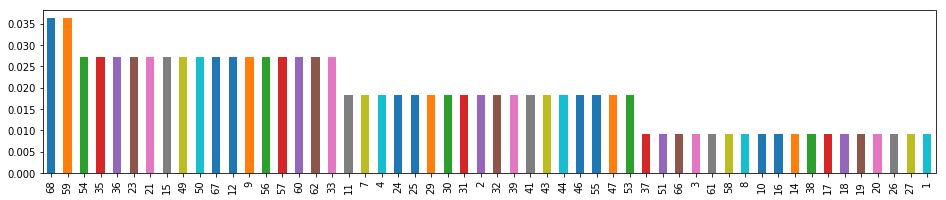

In [66]:
Days14 = df['2020']
vc14=Days14[['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts(normalize=True)
#vc14LTM=vc14[vc14 < 2]
vc14.plot(kind='bar', figsize=(16,3))
plt.show()

31


<function matplotlib.pyplot.show(*args, **kw)>

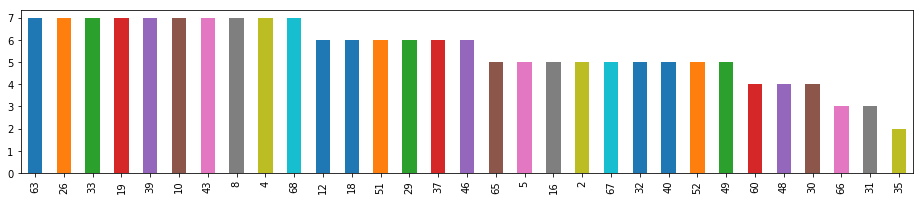

In [19]:
vc2018=df[['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
print(len(vc2018[vc2018 <= 7.4]))
(vc2018[vc2018 <= 7.4]).plot(kind='bar', figsize=(16,3))
plt.show

set(vc14LTM.index).symmetric_difference(vc2018.index)

# PB Analysis

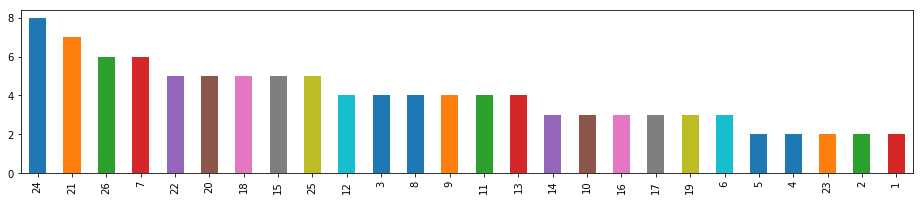

In [20]:
df['PB'].value_counts().plot(kind='bar', figsize=(16,3))

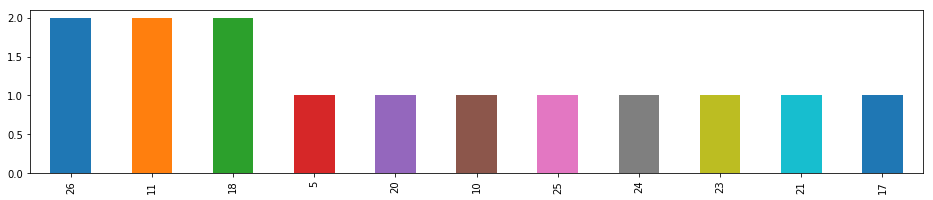

In [21]:
df[:14]['PB'].value_counts().plot(kind='bar', figsize=(16,3))

In [22]:
rng=pd.date_range(start='09/11/2018', periods=7, freq='W')
rng

DatetimeIndex(['2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07',
               '2018-10-14', '2018-10-21', '2018-10-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [23]:
#Ranges 1-69
rng1to69=list(range(1,70))
#=["%.1d" % i for i in range(1,70)]
#Ranges 1-69
rngpb26=["%.1d" % i for i in range(1, 27)]

In [22]:
#stack D columns toget total value counts of all drawings for the year 14 days
AllNum= df['2020-02'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
PickedNums = AllNum.index
print('Count', PickedNums)

Count Int64Index([35, 57, 36, 12, 54, 50, 47, 46, 19, 27, 25, 24, 23, 15, 16, 30, 14,
            10,  8, 68, 29, 62, 32, 33, 61, 37, 39, 41, 44, 49, 51, 55, 56, 59,
            60, 66],
           dtype='int64')


In [25]:
NotPicked_14 = set(rng1to69).symmetric_difference(PickedNums)
NotPicked_14

{2, 17, 18, 30, 31, 35, 41, 44, 48, 63, 66}

In [26]:
#stack D columns toget total value counts of most recent 14 drawings 
AllNum_14= df[1:15][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
PickedNums_14 = AllNum_14.index
print(AllNum_14[AllNum_14>1])

34    3
7     3
11    3
47    2
8     2
9     2
14    2
19    2
21    2
29    2
32    2
68    2
38    2
42    2
69    2
4     2
58    2
55    2
dtype: int64


In [27]:
AllNum_PB= df[0:14][['PB']].stack().value_counts()
PickedPB = AllNum_PB.index
PickedPB


Int64Index([26, 11, 18, 5, 20, 10, 25, 24, 23, 21, 17], dtype='int64')

In [28]:
PB14 = df[:14][['PB']].stack().value_counts()
PB14i =PB14.index
PB28 = df[:28][['PB']].stack().value_counts()
PB28i =PB28.index

#pb diff between 14 and 28 drawings
diffpb=PB28.index
e=diffpb
f=pb2.index
set(f).intersection(e)

sns.pairplot(df)